In [1]:
from bs4 import BeautifulSoup as Soup
import numpy as np
from scipy.ndimage import affine_transform
from PIL import Image
import os

import sys
sys.path.append("/home/tintin/rongheng/cv/")

from lib.image_lib import load_img, show_img, save_img
import registration as reg

xml_filename = "jkfaces.xml"

In [2]:
faces = reg.read_points_xml(xml_filename)
path = os.path.join(os.getcwd() + "/jkfaces_sorted/")
reg.rigid_alignment(faces, path)
path = path + "/aligned/"

skipping  20080210.jpg ...
skipping  20080601.jpg ...
skipping  20080226.jpg ...
skipping  20080513.jpg ...
skipping  20080202.jpg ...
skipping  20080213.jpg ...
skipping  20080509.jpg ...
skipping  20080615.jpg ...
skipping  20080414.jpg ...
skipping  20080114.jpg ...
skipping  20080625.jpg ...
skipping  20080124.jpg ...
skipping  20080310.jpg ...
skipping  20080104.jpg ...
skipping  20080502.jpg ...
skipping  20080407.jpg ...
skipping  20080217.jpg ...
skipping  20080505.jpg ...
skipping  20080315.jpg ...
skipping  20080608.jpg ...
skipping  20080203.jpg ...
skipping  20080224.jpg ...
skipping  20080113.jpg ...
skipping  20080515.jpg ...
skipping  20080606.jpg ...
skipping  20080617.jpg ...
skipping  20080215.jpg ...
skipping  20080125.jpg ...
skipping  20080403.jpg ...
skipping  20080103.jpg ...
skipping  20080512.jpg ...
skipping  20080227.jpg ...
skipping  20080207.jpg ...
skipping  20080525.jpg ...
skipping  20080511.jpg ...
skipping  20080308.jpg ...
skipping  20080421.jpg ...
s

In [3]:
files = os.listdir(path)
# Assuming all images are the same size, get dimensions of first image
w,h = Image.open(path+files[0]).size
N = len(files)

In [4]:
# Create a numpy array of floats to store the average (assume RGB) images
average = np.zeros((h,w,3), np.float)

# Build up average pixel intensities, casting each image as an array of floats.
for file in files:
    try:
        image = np.array(Image.open(os.path.join(path, file)), dtype=np.float)
    except FileNotFoundError:
            print("skipping", file)
            continue
            
    average = average + image/N

# Round values in array and cast as 8-bit integer
average = np.array(np.round(average), dtype=np.uint8)

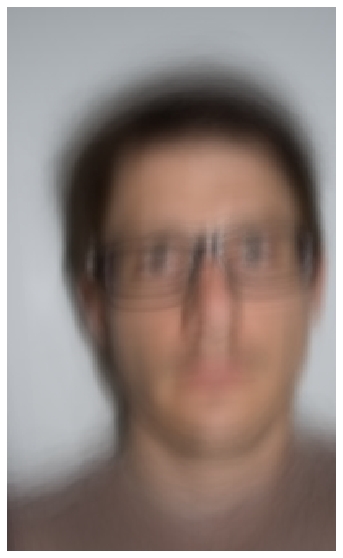

In [5]:
# Generate, save and preview final image
show_img(average)
save_img(average, 'average.jpg')

In [6]:
#mask = np.zeros(img.shape())
#immatrix = np.array([mask* np.array(Image.open(imlist[i]).convert('L')).flatten() for i in range(150)], 'f')